# Preparación de los conjuntos de validación y entrenamiento/test
En este notebook partiremos el dataset ya preprocesado en dos conjuntos diferentes, validación y entranamiento/test. Comenzamos importando todas las librerías necesarias.

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

Cargamos el pickle con el dataset preprocesado

In [2]:
df_INbreast = pd.read_pickle('./df_INbreast.pkl')

Apartamos el 20% de los datos por cada categoria para el set de validación

In [3]:
random_seed = 2021
frac_val = .2
casos_total = df_INbreast[['Bi-Rads']]
casos_val = casos_total[casos_total['Bi-Rads'] == 'benigno'].sample(frac = frac_val, random_state = random_seed)
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'seguimiento'].sample(frac = frac_val, random_state = random_seed))
casos_val = casos_val.append(casos_total[casos_total['Bi-Rads'] == 'maligno'].sample(frac = frac_val, random_state = random_seed))

In [4]:
df_INbreast_val = df_INbreast[df_INbreast.index.isin(casos_val.index)]
df_INbreast = df_INbreast[~df_INbreast.index.isin(casos_val.index)]

<Axes: title={'center': 'Conjunto validación'}>

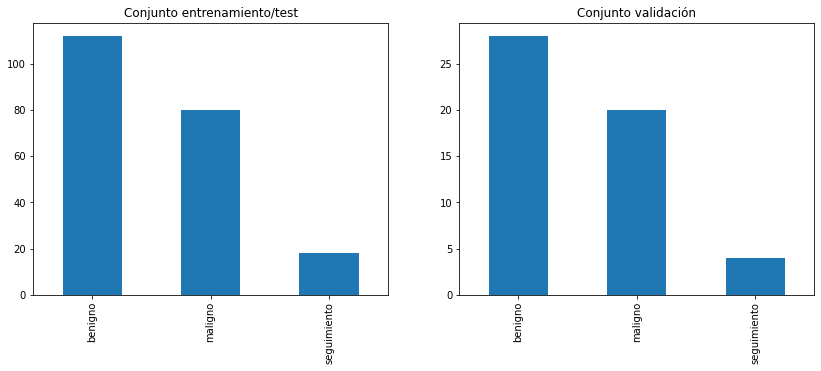

In [5]:
fig = plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
plt.title('Conjunto entrenamiento/test')
df_INbreast['Bi-Rads'].value_counts().plot(kind = 'bar')
plt.subplot(1, 2, 2)
plt.title('Conjunto validación')
df_INbreast_val['Bi-Rads'].value_counts().plot(kind = 'bar')

<Axes: >

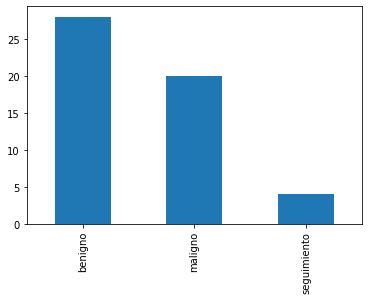

In [6]:
df_INbreast_val['Bi-Rads'].value_counts().plot(kind = 'bar')

In [7]:
df_INbreast_val.to_pickle('./df_INbreast_val.pkl', protocol=4)
df_INbreast.to_pickle('./df_INbreast_train.pkl', protocol=4)